# Statistical Power Assignment

In [2]:
import numpy as np
import pandas as pd

from scipy import stats
from statsmodels.stats.power import TTestIndPower

import matplotlib.pyplot as plt

%matplotlib inline

### Computing Sample Size Required

Suppose we are conducting a test where we have:

- Effect size of 0.5
- Significance level of 0.05
- Looking to achieve 80% statistical power

How large of a sample size would we need for this experiment?

In [3]:
analysis = TTestIndPower()

In [39]:
analysis.solve_power(effect_size=0.5, nobs1=None, alpha=0.05, power=0.8, ratio=1/3)

127.03848940009924

In [41]:
analysis.solve_power?

### Computing Effect Size Required

Suppose we are conducting a test where we have:

- Sample size of 100
- Significance level of 0.05
- Looking to achieve 80% statistical power

How large of an effect size would we need to see for this experiment?

In [22]:
analysis.solve_power(nobs1=100, alpha=0.05, power=0.8, ratio=1)

0.3981391173911278

Generate a power plot that shows how the statistical power of this test would change based on the number of observations and varying effect sizes.

In [29]:
n = 100
es = analysis.solve_power(nobs1=100, alpha=0.05, power=0.8, ratio=1)
sample_sizes = np.array([n * 0.1, n * 0.5, n, n * 2])
effect_sizes = np.array([es * 0.1, es * 0.5, es, es * 2])

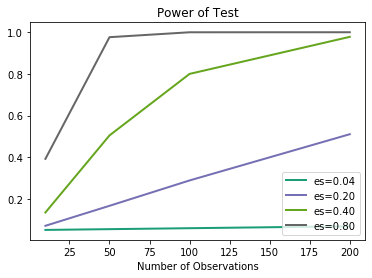

In [31]:
analysis.plot_power(
    dep_var="nobs", nobs=sample_sizes, alpha=0.05, effect_size=effect_sizes
)
plt.show()

### Computing Statistical Power

Suppose we are conducting a test where we have:

- Effect size of 0.4
- Sample size of 100
- Significance level of 0.05

What would be the statistical power for this experiment?

In [34]:
analysis.solve_power(effect_size=0.4, nobs1=100, alpha=0.05, power=None)

0.8036474965430749

Generate a plot that examines how the statistical power of this experiment would change based on different significance levels.

In [36]:
n = 100
es = 0.4
ps = [0.1, 0.05, 0.025, 0.0175, 0.01]

In [46]:
# for loop to calculate power for each p-value
powers = []
for p in ps:
    powers.append(analysis.solve_power(effect_size=0.4, nobs1=100, alpha=p, power=None))


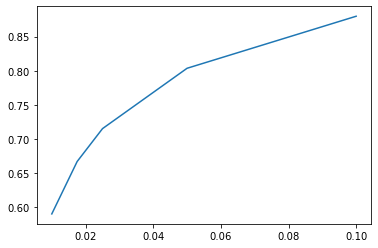

In [48]:
plt.plot(ps, powers)
plt.show()

## Computing Statistical Power for a Real Data Set

Yesterday afternoon, you conducted a t-test on the titanic data set to determine whether there was a significant difference between the average age of passengers who survived and those who did not survive. In this section, compute the statistical power of that test.

### Import the data, and drop rows where `'Age'` is NA.

In [50]:
data_url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv'

In [55]:
titanic = pd.read_csv(data_url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
ages = titanic[['Age', 'Survived']] 

In [54]:
ages.dropna(inplace=True)

C:\Users\dgump\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Summarize the number of observations and average age per group.

In [80]:
print(ages.groupby('Survived').Age.mean())
print(ages.Survived.value_counts())
lived = ages[ages["Survived"] == 1]
died = ages[ages["Survived"] == 0]

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64
0    424
1    290
Name: Survived, dtype: int64


### Perform t-test.

In [83]:
t, p = stats.ttest_ind(lived['Age'], died['Age'])

### Calculate the Effect Size

Effect size can be calculated by using a formula known as Cohen's d, which divides the difference in means between the two groups by their pooled standard deviation.

`effect_size = (mean_of_sample1 - mean_of_sample2) / pooled_stdev`

The pooled standard deviation in the denominator can be derived as follows.

`pooled_stdev = sqrt(((n_obs1 - 1) * var1 + (n_obs2 - 1) * var2) / (n_obs1 + n_obs2 - 2))`

Where `n_obs` is the number of observations and `var` is the variance of each sample.

**Write the code below to calculate the effect size for this test.**

In [86]:
x1 = lived['Age']
x2 = died['Age']

s_pooled_numerator = (x1.size - 1) * x1.var() + (x2.size - 1) * x2.var()
s_pooled_denominator = x1.size + x2.size - 2

s_pooled = np.sqrt(s_pooled_numerator / s_pooled_denominator)
s_pooled

effect_size = (x1.mean() - x2.mean()) / s_pooled
effect_size

-0.15748597191363295

**Use the effect size you calculated to compute the statistical power of this test.**

In [100]:
analysis = TTestIndPower()
analysis.solve_power(effect_size=effect_size, nobs1=x2.size, alpha=0.05, power=None, ratio=x1.size/x2.size)

0.5414181033266467

In [101]:
analysis.solve_power(effect_size=effect_size, nobs1=x2.size, alpha=0.05, power=None, ratio=x1.size/x2.size)

0.5414181033266467

**Determine the effect size we would need to see to get a statistical power of 0.8.**

In [102]:
es = analysis.solve_power(effect_size=None, nobs1=x2.size, alpha=0.05, power=0.8, ratio=x1.size/x2.size)
es

0.21377414540055398

**Determine the sample size necessary to get a statistical power of 0.8.**

In [109]:
samp_size = analysis.solve_power(effect_size=effect_size, nobs1=None, alpha=0.05, power=0.8)
samp_size

633.8876889361542

**Generate a visualization that shows the significance level we would need to get a statistical power of 0.8.**

In [129]:
n = x1.size
effect_size
ps = [0.4, 0.3, 0.2, 0.1, 0.05, 0.025, 0.0175, 0.01]

In [130]:
powers = []
for p in ps:
    powers.append(analysis.solve_power(effect_size=effect_size, nobs1=n, alpha=p, power=None))

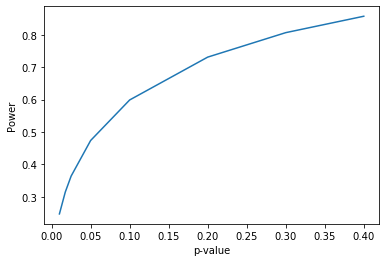

In [131]:
plt.plot(ps, powers)
plt.xlabel('p-value')
plt.ylabel('Power')
plt.show()